In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import spacy


movies_df = pd.read_csv('./wiki_movie_plots_deduped.csv',
                           usecols=['Release Year', 'Title', 'Plot', 'Genre'])

movies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Release Year  34886 non-null  int64 
 1   Title         34886 non-null  object
 2   Genre         34886 non-null  object
 3   Plot          34886 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


<Axes: ylabel='Genre'>

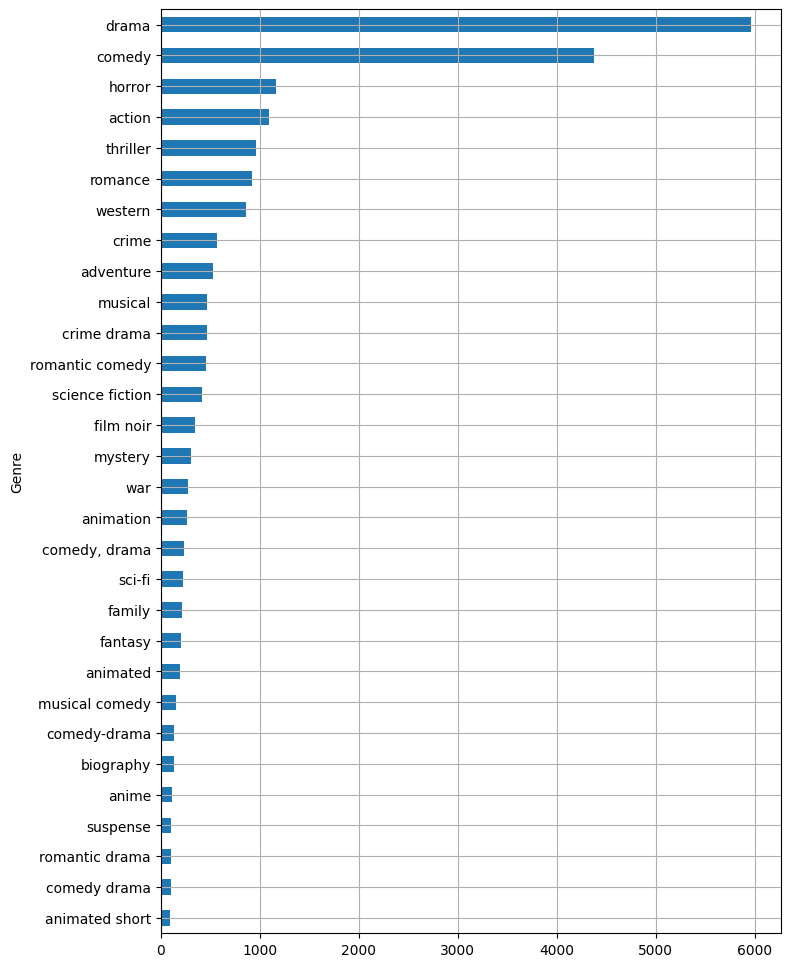

In [124]:
movies_df[movies_df["Genre"] != "unknown"].groupby(["Genre"]).size().sort_values(ascending=True).tail(30).plot.barh(figsize=(8, 12), grid=True)

In [125]:

# Check the number of rows and columns in the DataFrame
print("Number of rows:", movies_df.shape[0])
print("Number of columns:", movies_df.shape[1])

Number of rows: 34886
Number of columns: 4


In [126]:
def check_missing_values(df):
    # Count missing values in each column
    missing_values = df.isna().sum()

    # Calculate total missing values
    total_missing_values = missing_values.sum()
    
    # Calculate percentage of missing values
    percentage_missing_values = (total_missing_values / df.shape[0]) * 100

    # Return a dictionary with counts and percentages
    return {
        'Total missing values': total_missing_values,
        'Percentage missing values': percentage_missing_values
    }



In [127]:
# Print the results of the function
print(check_missing_values(movies_df))

{'Total missing values': 0, 'Percentage missing values': 0.0}


In [128]:
import certifi
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

print("Certificates installed successfully.")

Certificates installed successfully.


Below we get the list of the most frequent words and their occurrences in the plots of the movies after removing all the stopwords.

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annilamunsaf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


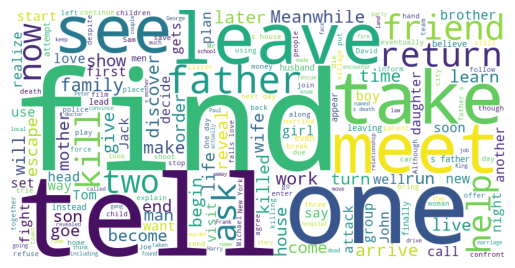

In [129]:
import nltk
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize

# Extract the movie plots
plots = movies_df['Plot']

# Remove stopwords from the plots
stop_words = set(STOPWORDS)

filtered_plots = []
for plot in plots:
    words = word_tokenize(plot)
    filtered_words = [word for word in words if word not in stop_words]
    filtered_plots.append(' '.join(filtered_words))
    
    # Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate(' '.join(filtered_plots))

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [130]:
from nltk.stem import SnowballStemmer
nltk.download('wordnet')
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer

stemmer = SnowballStemmer('english')

def preprocess(text):
    result = []

    # Remove stopwords
    for token in gensim.utils.simple_preprocess(text):
        if token not in STOPWORDS:
            result.append(token)

    # Remove tokens shorter than 3 characters
    result = [token for token in result if len(token) > 2]

    # Lemmatize remaining tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token,pos='v') for token in result]

    return lemmatized_tokens

# Apply the preprocess function to the movie plots
preprocessed_documents = plots.map(preprocess)


preprocessed_documents.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/annilamunsaf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [bartender, work, saloon, serve, drink, custom...
1    [moon, paint, smile, face, hang, park, night, ...
2    [film, minute, long, compose, shots, girl, sit...
3    [last, second, consist, shots, shoot, set, woo...
4    [earliest, know, adaptation, classic, fairytal...
Name: Plot, dtype: object

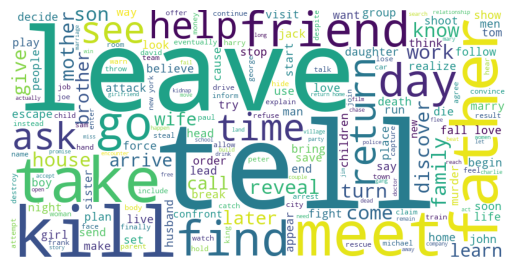

In [131]:
from wordcloud import WordCloud, STOPWORDS
# Remove stopwords from the plots
stop_words = set(STOPWORDS)

filtered_plots = []
for document in preprocessed_documents:
    filtered_words = [word for word in document if word not in stop_words]
    filtered_plots.append(' '.join(filtered_words))
    
    # Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate(' '.join(filtered_plots))

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [132]:
movies_df.head()


,Release Year,Title,Genre,Plot
0,1901,Kansas Saloon Smashers,unknown,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,unknown,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,unknown,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",unknown,Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,unknown,The earliest known adaptation of the classic f...


In [137]:
# Initialize stemmer and lemmatizer
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

# Function to preprocess a list of words
def preprocess(text):
    result = []

    # Remove stopwords
    for token in gensim.utils.simple_preprocess(text):
        if token not in STOPWORDS:
            result.append(token)

    # Remove tokens shorter than 3 characters
    result = [token for token in result if len(token) > 2]

    # Lemmatize remaining tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = ' '.join([lemmatizer.lemmatize(token, pos='v') for token in result])

    return lemmatized_tokens

# Apply the preprocess function to the 'plot' column
movies_df['Preprocessed_plot'] = movies_df['Plot'].apply(preprocess)


In [138]:
movies_df.head()


,Release Year,Title,Genre,Plot,preprocessed_plot,Preprocessed_plot
0,1901,Kansas Saloon Smashers,unknown,"A bartender is working at a saloon, serving dr...",bartender work saloon serve drink customers fi...,bartender work saloon serve drink customers fi...
1,1901,Love by the Light of the Moon,unknown,"The moon, painted with a smiling face hangs ov...",moon paint smile face hang park night young co...,moon paint smile face hang park night young co...
2,1901,The Martyred Presidents,unknown,"The film, just over a minute long, is composed...",film minute long compose two shots first girl ...,film minute long compose two shots first girl ...
3,1901,"Terrible Teddy, the Grizzly King",unknown,Lasting just 61 seconds and consisting of two ...,last second consist two shots first shoot set ...,last second consist two shots first shoot set ...
4,1902,Jack and the Beanstalk,unknown,The earliest known adaptation of the classic f...,earliest know adaptation classic fairytale fil...,earliest know adaptation classic fairytale fil...


In [144]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader

# Download the pre-trained Word2Vec model (you can choose a different model)
word2vec_model = gensim.downloader.load('word2vec-google-news-300')


user_input = "castle sister snow ice elsa"
user_tokens = [token for token in word_tokenize(user_input.lower()) if token.isalpha()]


# Function to calculate cosine similarity between two sets of embeddings
def calculate_cosine_similarity(embeddings1, embeddings2):
    if embeddings1 is not None and embeddings2 is not None:
        return cosine_similarity([embeddings1], [embeddings2])[0][0]
    else:
        return None

# Function to aggregate word embeddings for a lemmatized plot
def aggregate_embeddings(lemmatized_plot, model):
    tokens = lemmatized_plot.split()
    # Filter out tokens that are not in the vocabulary of the Word2Vec model
    valid_tokens = [token for token in tokens if token in model.key_to_index]

    # Return the mean of the word embeddings for the valid tokens
    if valid_tokens:
        embeddings = [model.wv[token] for token in valid_tokens]
        aggregated_embedding = sum(embeddings) / len(embeddings)
        return aggregated_embedding
    else:
        return None
    
    
# Assuming you have a DataFrame named movies_df with 'Preprocessed_plot' column
movies_df['plot_embeddings'] = movies_df['Preprocessed_plot'].apply(lambda lemmatized_plot: aggregate_embeddings(lemmatized_plot, word2vec_model))
movies_df['cosine_similarity'] = movies_df['plot_embeddings'].apply(lambda embeddings: calculate_cosine_similarity(embeddings, word2vec_model))

# Sort the DataFrame based on 'cosine_similarity' in ascending order
movies_df_sorted = movies_df.sort_values(by='cosine_similarity', ascending=True)

# Retrieve the top 10 movies
top_10_movies = movies_df_sorted.head(10)

# Display the top 10 movies
print(top_10_movies[['Preprocessed_plot', 'cosine_similarity']])

AttributeError: 'KeyedVectors' object has no attribute 'wv'

Possible Algorithms:
Doc2Vec, Topic Modeling, Word Embeddings, TF-IDF (Term Frequency-Inverse Document Frequency), Jaccard Similarity, 
BM25